# PCA on Raman spectra of bones

In this notebook we will apply the Principal Components Analysis (PCA) technique on Raman spectra of bones with the purpose of reducing the dimensionality of the spectra and to find out a possible correlation between them. All spectra have already been preproccesed (smoothed, background corrected etc.) and are stored in a .xlsx file.

## Loading the data

Let's load the data in a pandas dataframe using the **pandas.read_excel()** function to see what's inside the .xlsx file.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load excel
df = pd.read_excel('Book1.xlsx')
df.head()  # show head

,SP_12,SP_13,SP_14,SP_16,SP_17,SP_18,SP_21,SP_23,SP_7,SP_9
Raman shift [1/cm],Intensity,Intensity,Intensity,Intensity,Intensity,Intensity,Intensity,Intensity,Intensity,Intensity
1799.37,0.00067396,0.0015262,0.0016579,0.001276,0.001157,0.00049617,0.0015453,0.0012125,0.00039121,0.00042321
1797.728,0.0030657,0.0014157,0.0026677,0.0024631,0.002722,0.0025741,0.0032088,0.002399,0.004259,0.0018459
1796.086,0.0039349,0.0021411,0.0034456,0.0030594,0.0033552,0.0041694,0.0034125,0.0024663,0.0056899,0.0022714
1794.443,0.0047444,0.0038387,0.0047478,0.0041124,0.0039831,0.0050702,0.0042908,0.0028068,0.0060642,0.0028622


As we see, the first column of the dataframe contains the Raman shifts, while the first row contains the spectra names and the second row contains the units of the measurements. We will use the Raman shifts column as the index of the dataframe and the spectra names as its header using the `header` and `index_col` options of the **read_excel()** function. The units row will be skipped using the `skiprows` option.

Note on `skiprows`:

* If we use `skiprows=n`, the first n rows will be skipped.

* If we use `skiprows=[n]`, the n<sup>th</sup> row will be skipped. We can also use `skiprows` with a list of rows if we want to skip multiple rows.


In [3]:
# load excel (first row as header, first column as index, skip second row)
df = pd.read_excel('Book1.xlsx', header=0, index_col=0, skiprows=[1])
df.head()  # show head

,SP_12,SP_13,SP_14,SP_16,SP_17,SP_18,SP_21,SP_23,SP_7,SP_9
1799.370,0.000674,0.001526,0.001658,0.001276,0.001157,0.000496,0.001545,0.001213,0.000391,0.000423
1797.728,0.003066,0.001416,0.002668,0.002463,0.002722,0.002574,0.003209,0.002399,0.004259,0.001846
1796.086,0.003935,0.002141,0.003446,0.003059,0.003355,0.004169,0.003413,0.002466,0.005690,0.002271
1794.443,0.004744,0.003839,0.004748,0.004112,0.003983,0.005070,0.004291,0.002807,0.006064,0.002862
1792.801,0.004761,0.005223,0.005747,0.004835,0.004992,0.005627,0.005921,0.003457,0.006138,0.002508


In [4]:
# dimensions of the dataframe
df.shape

(853, 10)

Some descriptive statistics on the dataframe can be provided by the **describe()** attribute of the dataframe.

In [5]:
df.describe()  # describe dataframe

,SP_12,SP_13,SP_14,SP_16,SP_17,SP_18,SP_21,SP_23,SP_7,SP_9
count,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,0.037517,0.038175,0.038545,0.033312,0.033158,0.033783,0.033728,0.030341,0.032365,0.031878
std,0.063975,0.066134,0.067900,0.052349,0.052429,0.050337,0.043165,0.029881,0.044393,0.042795
min,0.000674,0.001416,0.001342,0.001034,0.000819,0.000496,0.001545,0.001213,0.000391,0.000423
25%,0.018425,0.018645,0.018096,0.016528,0.016764,0.018301,0.018480,0.019424,0.017967,0.016699
50%,0.024354,0.023988,0.024443,0.023883,0.023483,0.024078,0.024233,0.025515,0.023650,0.023373
75%,0.033201,0.033218,0.034195,0.032103,0.031534,0.032645,0.033102,0.032924,0.032219,0.031860
max,0.668520,0.689070,0.706130,0.539370,0.548270,0.516860,0.361580,0.313830,0.460930,0.396840


It is obvious that all spectra are similar in terms of mean values and standard deviations.

## Visualization

Let's plot the dataframe using the dataframe's plot attribute, which is based on matplotlib, to get a visualization of the spectra.

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # plot style to use

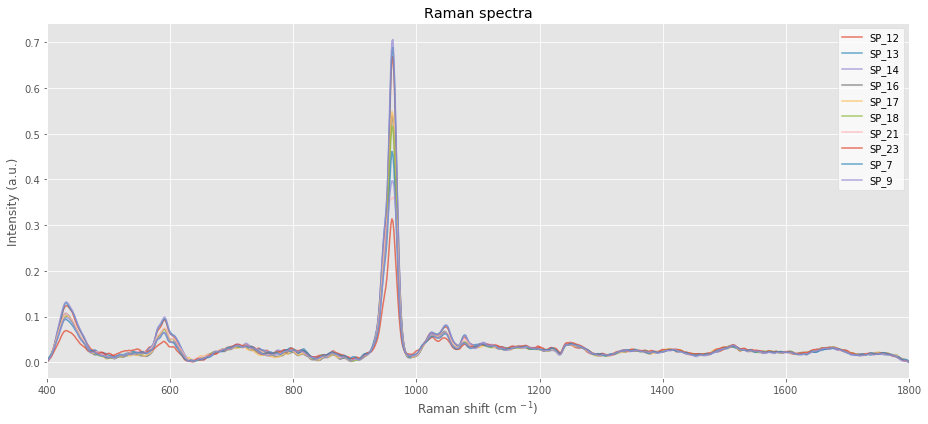

In [7]:
# create figure and set its size
fig, ax = plt.subplots(figsize=(13, 6))

plt.title('Raman spectra')  # plot title

df.plot(kind='line', alpha=0.75, ax=ax)  # plot dataframe

ax.set_xlabel('Raman shift (cm $\mathrm{^{-1}}$)')  # x-axis label
ax.set_ylabel('Intensity (a.u.)')  # y-axis label

ax.invert_xaxis()  # invert x-axis (dataframe is sorted high to low)

plt.legend(facecolor='white', framealpha=0.75)  # plot legend
plt.tight_layout()  # set tight layout
plt.show()  # show plot

We can see that the main differences of the spectra lie in the two peaks of the 400-650 cm<sup>-1</sup> region, in the region of the central maximum and in the 1000-1100 cm<sup>-1</sup> region.

## Standardization (scaling)

Before applying a PCA, it is usually advised that the data should be standardized, such that they have a mean value equal to zero and a standard deviation equal to one. That is perfectly true for data of different variables, for example length, width, weight of an object. For Raman spectra, however, there is a [debate](https://www.researchgate.net/post/What_is_the_best_way_to_scale_parameters_before_running_a_Principal_Component_Analysis_PCA) over whether the spectra should be standardized or not. It is generally suggested that Raman spectra should not be standardized, since for PCA we want to have the maximum variation of the data, so that the spectra varying the most contribute more than the rest. Additionally, standardization tends to over-weight the noise and down-weight the useful signal of the spectra.

If we wanted to standardize the spectra we could easily do that using the **sklearn.preprocessing.StandardScaler()** to create a scaler object. Then we could use this object to scale the dataframe or array we wished. The resulting transformed object would be a NumPy array.

## PCA

The PCA will be performed using the **sklearn.decomposition.PCA()** function. This function takes an $m \times n$ array or dataframe and calculates its $n$ principal components. Therefore, since we need the principal components of the spectra, we have to use the transposed $10 \times 853$ dataframe.

In [8]:
df_T = df.T  # transpose dataframe
df_T  # show dataframe

,1799.37,1797.728,1796.086,1794.443,1792.801,1791.159,1789.516,1787.874,1786.232,1784.589,...,414.886,413.244,411.602,409.959,408.317,406.675,405.032,403.39,401.748,400.105
SP_12,0.000674,0.003066,0.003935,0.004744,0.004761,0.005452,0.006318,0.007308,0.008320,0.009925,...,0.052284,0.043989,0.035827,0.029009,0.022451,0.015934,0.011547,0.007642,0.003917,0.004327
SP_13,0.001526,0.001416,0.002141,0.003839,0.005223,0.006177,0.006625,0.007133,0.007201,0.007742,...,0.054911,0.044543,0.035081,0.026820,0.019893,0.013916,0.009785,0.006234,0.003128,0.002298
SP_14,0.001658,0.002668,0.003446,0.004748,0.005747,0.006943,0.007414,0.007824,0.007832,0.008778,...,0.056889,0.046271,0.036287,0.027356,0.020217,0.015170,0.010537,0.007557,0.004842,0.001342
SP_16,0.001276,0.002463,0.003059,0.004112,0.004835,0.005410,0.006889,0.008223,0.008755,0.009389,...,0.048089,0.040639,0.033243,0.026731,0.021114,0.016392,0.012324,0.008385,0.004514,0.001034
SP_17,0.001157,0.002722,0.003355,0.003983,0.004992,0.006017,0.006943,0.007829,0.008758,0.009759,...,0.046748,0.039388,0.031534,0.024314,0.018527,0.013974,0.009986,0.006978,0.004597,0.000819
SP_18,0.000496,0.002574,0.004169,0.005070,0.005627,0.006362,0.006677,0.007056,0.008482,0.010554,...,0.047931,0.040676,0.033426,0.027035,0.021103,0.015777,0.011419,0.007668,0.004198,0.001079
SP_21,0.001545,0.003209,0.003413,0.004291,0.005921,0.006039,0.007277,0.008679,0.009658,0.010504,...,0.048767,0.041209,0.034027,0.027154,0.020552,0.015164,0.010109,0.006349,0.003827,0.001589
SP_23,0.001213,0.002399,0.002466,0.002807,0.003457,0.003936,0.005045,0.006826,0.008064,0.009253,...,0.032845,0.028611,0.024501,0.019716,0.015012,0.011540,0.008603,0.006249,0.004053,0.001340
SP_7,0.000391,0.004259,0.005690,0.006064,0.006138,0.006114,0.005747,0.006405,0.008580,0.010518,...,0.043699,0.036478,0.030036,0.024703,0.020357,0.016869,0.013518,0.010745,0.006782,0.000904
SP_9,0.000423,0.001846,0.002271,0.002862,0.002508,0.002372,0.002682,0.003606,0.004655,0.006461,...,0.044214,0.037725,0.030455,0.023510,0.017728,0.013774,0.009550,0.007041,0.005135,0.001350


In [9]:
from sklearn.decomposition import PCA

In [10]:
# create a pca object
# if n_components is not set, all components are kept
pca = PCA()
# fit the pca object with the dataframe and transform the dataframe
trans_data = pca.fit_transform(df_T)

Now that we implemented the PCA, let's have a look at the explained variance ratio and the cumulative explained variance ratio of the Principal Components (PCs). The explained variance ratio tells us how much each PC contributes to the variance of the spectra, while the cumulative explained variance ratio is the successive sum of the PCs' explained variance ratio.

In [11]:
# explained variance ratio
exp_var_rat = pca.explained_variance_ratio_
# cumulative explained variance ratio
cum_exp_var_rat = np.cumsum(exp_var_rat)

# print values
print('Explained variance:\n', exp_var_rat)
print('\nCumulative explained variance:\n', cum_exp_var_rat)

Explained variance:
 [9.38910897e-01 3.85750663e-02 1.36524525e-02 2.18571768e-03
 1.80015889e-03 1.40525637e-03 1.29275407e-03 1.20860277e-03
 9.69094017e-04 2.96826157e-31]

Cumulative explained variance:
 [0.9389109  0.97748596 0.99113842 0.99332413 0.99512429 0.99652955
 0.9978223  0.99903091 1.         1.        ]


It is obvious, from the cumulative explained variance ratio, that the first two PCs explain almost all variance of the spectra (97.7%). But is this number the correct number of components to keep?

### Scree plot

The recommended way to answer the above question is to create a *scree plot*. A scree plot is a plot in which the $x$-axis represents the nummber of principal components, while the $y$-axis represents the explained variance ratio of each component and. The contents of the plot are the explained variance ratio and the cumulative explained variance ratio. After creating the plot, we look for the "elbow" of the explained variance ratio plot, from which point onwards the plot reaches a plateau. The "elbow" point usually tells us how many principal components we have to keep to have a reliable dimensionality reduction, although depending on the quality of the data, the "elbow" might not be so clear or, sometimes, there is a double "elbow". So we have to be careful to choose the right number of PCs.

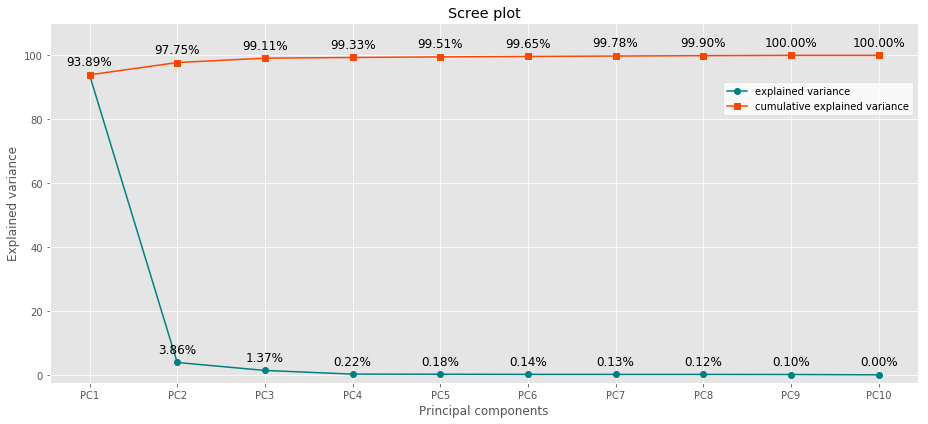

In [12]:
fig, ax = plt.subplots(figsize=(13, 6))  # create figure and set its size

x = [i for i in range(len(exp_var_rat))]  # x-axis values

# # create scree plot with bars
# # bar plot
# bar = ax.bar(x, exp_var_rat * 100,  # x-y values
#        color='teal',  # color
# #        width=0.75,  # bar width
#        label='explained variance')  # plot label
# line plot
# line plot
line1 = ax.plot(x, exp_var_rat * 100,  # x-y axes
                marker='o',  # marker style
                color='teal',  # color
                label='explained variance')  # plot label

line2 = ax.plot(x, cum_exp_var_rat * 100,  # x-y axes
                marker='s',  # marker style
                color='orangered',  # color
                label='cumulative explained variance')  # plot label

# # text over bars
# for rect in bar:
#     height = rect.get_height()  # bar height
#     width = rect.get_width()  # bar width
#     pos = rect.get_x()  # bar position
#     ax.text(pos + width / 2, height + 1,  # x-y coordinates
#             '{:.2f}%'.format(height),  # text and formatting
#             ha='center',  # horizontal alignment
#             va='bottom',  # vertical alignment
#             fontsize=12)  # font size

# text over points
yticks = ax.get_yticks()  # get y-axis ticks positions
offset = (yticks[-1] - yticks[-2]) * 0.1  # calculate y-axis offset

# text over line1 points
for i in range(0, len(exp_var_rat)):
    t1 = ax.text(x[i], exp_var_rat[i] * 100 + offset,  # x-y coordinates
                 '{:.2f}%'.format(exp_var_rat[i] * 100),  # text
                 ha='center',  # horizontal alignment
                 va='bottom',  # vertical alignment
                 fontsize=12)  # font size
# t1 background
#     t1.set_bbox(dict(alpha=0.35, facecolor='white'))

# text over line2 points
for i in range(1, len(cum_exp_var_rat)):
    t2 = ax.text(x[i], cum_exp_var_rat[i] * 100 + offset,  # x-y coordinates
                 '{:.2f}%'.format(cum_exp_var_rat[i] * 100),  # text
                 ha='center',  # horizontal alignment
                 va='bottom',  # vertical alignment
                 fontsize=12)  # font size
# t2 background
#     t2.set_bbox(dict(alpha=0.35, facecolor='white'))

plt.title('Scree plot')
ax.set_xlabel('Principal components')
ax.set_ylabel('Explained variance')  # y-axis label
ax.set_xticks(x)  # x-axis ticks in defined positions
# manual x-axis labels in the above-defined positions
ax.set_xticklabels(['PC{:d}'.format(i + 1) for i in range(len(exp_var_rat))])
ax.set_ylim(-2.5, 110)  # y-axis limits

plt.legend(facecolor='white', bbox_to_anchor=(1.0, 0.85))  # plot legend
plt.tight_layout()  # use tight layout
plt.show()  # show plot

There is a clear "elbow" on PC2, meaning that the right number of components to keep is 2. In this case it is easy to choose the number of components. In other cases it might be harder.

In [13]:
pca2 = PCA(n_components=2)  # create a pca object with 2 components
# fit the pca2 object with the dataframe and transform the dataframe
trans_data2 = pca2.fit_transform(df_T)
trans_data2  # show transformed data components

array([[-0.39667532, -0.00798239],
       [-0.46061538,  0.01045806],
       [-0.51257017,  0.00559167],
       [-0.02295756, -0.04127692],
       [-0.02862975, -0.06051143],
       [ 0.02718924, -0.01643228],
       [ 0.27081487,  0.18278255],
       [ 0.64420818, -0.0817276 ],
       [ 0.20696071, -0.04525339],
       [ 0.27227518,  0.05435171]])

Let's put the PCA transformed data for 2 PCs in a dataframe, just for better display of the components.

In [14]:
# create pca2 dataframe
df_trans = pd.DataFrame(trans_data2, columns=['PC1', 'PC2'],
                        index=df_T.index)
df_trans  # show dataframe

,PC1,PC2
SP_12,-0.396675,-0.007982
SP_13,-0.460615,0.010458
SP_14,-0.512570,0.005592
SP_16,-0.022958,-0.041277
SP_17,-0.028630,-0.060511
SP_18,0.027189,-0.016432
SP_21,0.270815,0.182783
SP_23,0.644208,-0.081728
SP_7,0.206961,-0.045253
SP_9,0.272275,0.054352


### Scores plot

Each element on the above dataframe is called a *score*. The PC1 and PC2 scores of each row represent the coordinates of a spectrum in the PC axes.

A PCA scores plot is most of the times the main goal of a PCA. A scores plot is a scatter plot of the projection of the data on the PC axes, in two or three dimesions, and often shows data clustering that can be used for the classification and the discrimination of the data.

In [15]:
names = df_trans.index
names

Index(['SP_12', 'SP_13', 'SP_14', 'SP_16', 'SP_17', 'SP_18', 'SP_21', 'SP_23',
       'SP_7', 'SP_9'],
      dtype='object')

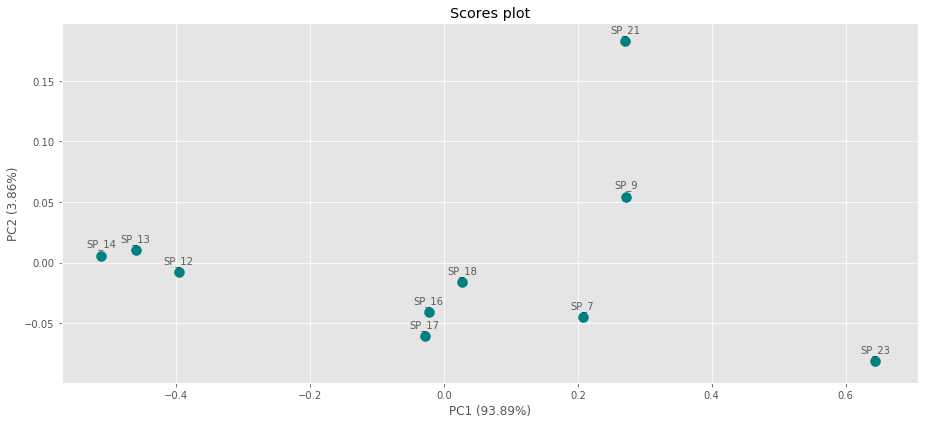

In [16]:
fig, ax = plt.subplots(figsize=(13, 6))  # create figure and set its size

for n in names:
    # scatter plot
    ax.scatter(df_trans['PC1'][df_trans.index == n],  # x value
               df_trans['PC2'][df_trans.index == n],  # y value
               s=100,  # marker size
               color='teal')  # color

# text over points
yticks = ax.get_yticks()  # get y-axis ticks positions
offset = (yticks[-1] - yticks[-2]) * 0.1  # calculate y-axis offset

for n in names:
    ax.text(df_trans['PC1'][df_trans.index == n],  # x value
            df_trans['PC2'][df_trans.index == n] + offset,  # y value
            s=n,  # text
            fontsize=10,  # font size
            alpha=0.6,  # transparency
            ha='center',  # horizontal alignment
            va='bottom')  # vertical alignment

plt.title('Scores plot')
ax.set_xlabel('PC1 ({:.2f}%)'.format(exp_var_rat[0] * 100))  # x-axis label
ax.set_ylabel('PC2 ({:.2f}%)'.format(exp_var_rat[1] * 100))  # y-axis label

plt.tight_layout()  # use tight layout
plt.show()  # show plot

We see that spectra `SP_12`, `SP_13` and `SP_14` are clearly separated from the rest against the PC1. We cannot say much about the rest of the spectra since it is a small dataset.

### Loadings plots

The *PC loadings* describe how much of the variation in a variable (Raman shift in our case) is explained by each PC. They represent, essentially, the weight by which each original variable should be multiplied to get the component score. We calculate the loadings as follows:

In [17]:
# calculate the loadings
loadings = pca2.components_.T * np.sqrt(pca2.explained_variance_)
loadings[0:5, :]  # show first 5 loadings

array([[-1.41688622e-04,  1.14728611e-04],
       [ 1.49222969e-04, -7.95684304e-06],
       [-1.71090281e-05, -1.46856431e-04],
       [-3.44229877e-04, -4.31781886e-05],
       [-4.66257672e-04,  1.66731676e-04]])

In the above calculation, the `components_` attribute gives the orthogonal basis of the space we are projecting the data into.

By using the loadings plots we get a better understanding of what the most signifficant variables in our data are.

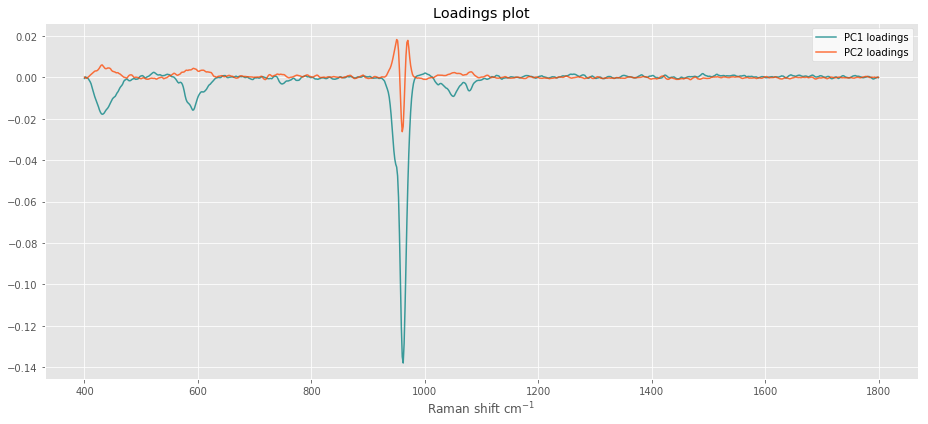

In [18]:
fig = plt.figure(figsize=(13, 6))  # create figure and set its size

# plot PC1 loadings
plt.plot(df_T.columns, loadings[:, 0], color='teal',
         label='PC1 loadings', alpha=0.75)
# plot PC2 loadings
plt.plot(df_T.columns, loadings[:, 1], color='orangered',
         label='PC2 loadings', alpha=0.75)

plt.title('Loadings plot')  # plot title

plt.xlabel('Raman shift cm$\mathrm{^{-1}}$')  # x-axis label

plt.legend(facecolor='white')  # plot legend
plt.tight_layout()  # set tight layout
plt.show()  # show plot

From this plot we see that the regions that contribute the most to the variance of the spectra are the ones we mentioned in the "Visualization" part of this notebook plus a small contribution from the region 750-800 cm<sup>-1</sup>.